## Lab 02: Project Gutenberg Books (1/2)

In this lab we will process books from the [Project Gutenberg](https://www.gutenberg.org/) site which is a public respository of large numbers of books that are in the public domain. We will first go over the two books used in the demo code for YData, and then you will have a chance to process books of your own choosing.





In [1]:
from datascience import *
import numpy as np

# direct plots to appear within the cell, and set their style
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# turn off some pesky warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

The online book for "Adventures of Huckleberry Finn," by Mark Twain, is [here](https://www.gutenberg.org/ebooks/76).
From this web site you can see various metadata for the book as well as the [link the text itself](https://www.gutenberg.org/files/76/76-0.txt), which is [https://www.gutenberg.org/files/76/76-0.txt](https://www.gutenberg.org/files/76/76-0.txt)


In [3]:
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]



The online book for "Little Women," by Louisa May Alcott, is [here](https://www.gutenberg.org/ebooks/514).
From this web site you can see various metadata for the book as well as the [link the text itself](http://www.gutenberg.org/cache/epub/514/pg514.txt), which is [http://www.gutenberg.org/cache/epub/514/pg514.txt](http://www.gutenberg.org/cache/epub/514/pg514.txt)


In [4]:
little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [5]:
# Display the chapters of Huckleberry Finn

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
VII. “GIT up! What you 'bout?” I opened my eyes and look ...
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


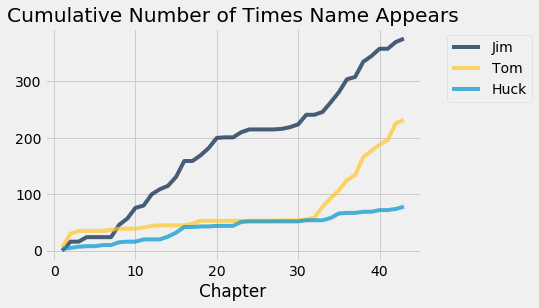

In [7]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [9]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [11]:
# Counts of names in the chapters of Little Women

# this is a dictionary based method to do what we did earlier for Huck:
people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])

# this will be the same!
counts2 = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
    ])


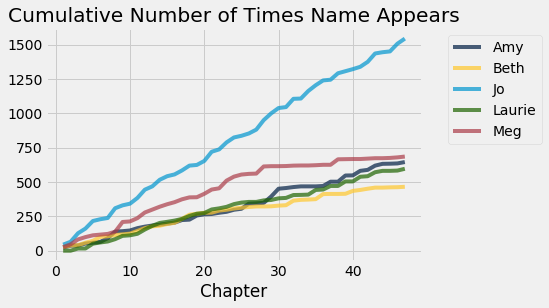

In [12]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In [13]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])

chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [14]:
# The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [15]:
# The counts for Little Women

chars_periods_lw

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18507,185


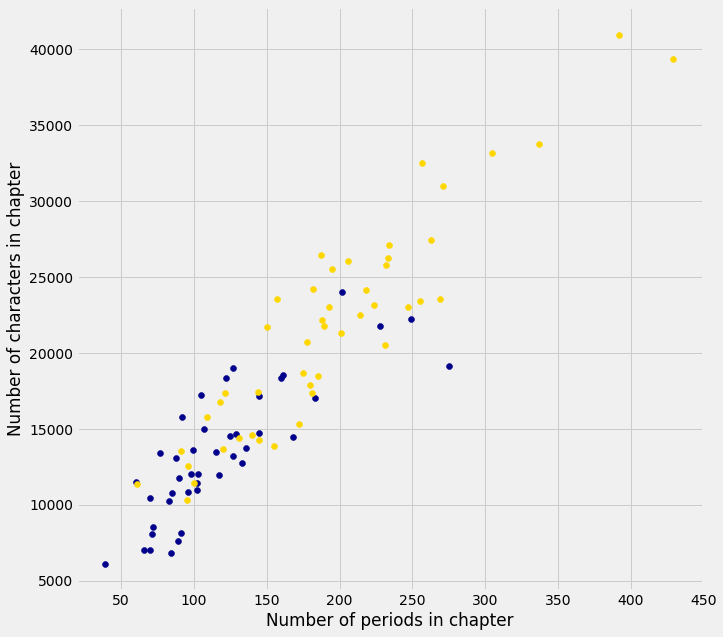

In [16]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

## Your turn!

Your task is to repeat the above analysis for two new Gutenberg books, of your own choosing.
If you need any suggestions, just check out [the most popular books](https://www.gutenberg.org/browse/scores/top). Or, just try [a random book](https://www.gutenberg.org/ebooks/search/?sort_order=random)! Remember, you can access the raw text by clicking on the 'Plain Text UTF-8' link.

Finish your notebook by describing a 'story' for why the number of occurrences of the characters by chapter have the shapes they do, as we did for Huckleberry Finn.
Specifically, you need to carry out the following steps:

* Choose a book from Gutenberg. You should be vaguely familiar with the plot, enough to do a quick refresher with some Googling. 
* Browse the book, and learn its structure in the raw text, and how chapters are delineated.
* Split the text into chapters, and figure out how many you might need to ignore with the table of contents, frontmatter, etc.
* Determine who the main characters are, and find how many times they are mentioned in each chapter.
* Do the same for the chapter lengths and number of periods.
* Give plots as above.
* Add a cell that gives a 'story' for how the plots reflect the actual plot of the book.

Then repeat this for a second book. You can copy-paste the above cells below, and then edit them with the modified code for your own books. You can either do the two books together, as above, or separate them and do one book at a time.

Your final notebook should include the code above for HF and LW, as well as your own analysis below for your two books of choice.

Have fun!




